In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud
from collections import Counter #빈도분석
import matplotlib.pyplot as plt #시각화 해주는 라이브러리

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from tqdm import tqdm_notebook as tqdm

In [4]:
from bs4 import BeautifulSoup as bs
import requests as req

In [6]:
import pickle
from PIL import Image
import numpy as np

In [162]:
stopwords = ['있다','하다','되다']

def extract_noun(string):
        nouns = okt.nouns(string)
        return nouns

def extract_Adjective(string):
    Adjective = okt.pos(string)
    Adjective_list = []
    for word, tag in Adjective:
        if((tag in 'Adjective') and (word not in stopwords) ):
            Adjective_list.append(word)
    return Adjective_list

def extract_Verb(string):
    Verb = okt.pos(string, stem=True, norm=True)
    Verb_list = []
    for word, tag in Verb:
        if((tag in 'Verb') and (word not in stopwords)):
            Verb_list.append(word)  
    return Verb_list

def extract_word(string):
    noun = extract_noun(string)
    Adjective = extract_Adjective(string)
    Verb = extract_Verb(string)
    word_list = []
    for i in noun+Adjective+Verb:
        word_list.append(i) 
    return word_list

In [7]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [8]:
driver.maximize_window()

In [9]:
driver.get('https://www.16personalities.com/ko/%EC%84%B1%EA%B2%A9%EC%9C%A0%ED%98%95-infj')

In [38]:
soup = bs(driver.page_source, 'html.parser')
total = soup.select('article.main.description')
total

[<article class="main description"><h1>
                                                             성격유형 : “옹호자”
                                                     </h1> <blockquote><p>사람을 대할 때는 그 사람의 잠재력을 봐야 하며, 다른 사람들이 잠재력을 발휘할 수 있도록 도와야 한다.</p> <footer>요한 볼프강 폰 괴테</footer></blockquote> <p>옹호자(INFJ)는 매우 희귀한 성격임에도 불구하고 세상에 큰 영향력을 발휘하곤 합니다. 이들은 이상주의적이고 원칙주의적인 성격으로, 삶에 순응하는 대신 삶에 맞서 변화를 만들어 내고자 합니다. 이들에게 성공이란 돈이나 지위가 아니라 자아를 실현하고 다른 사람을 도우며 세상에서 선을 실천하는 일입니다.</p> <p>원대한 목표와 야망을 품고 있다고 해서 옹호자가 몽상가와 같은 성격이라는 뜻은 아닙니다. 이들은 원칙과 완벽함을 중시하며 자신이 옳다고 믿는 일을 끝내기 전에는 만족하지 않습니다. 또한 매우 양심적인 성격으로 자신의 확실한 가치관에 따라 인생을 살아가며, 다른 사람이나 사회의 가치를 따르는 대신 자신의 지혜와 직관을 통해 정말로 중요한 가치를 찾기 위해 노력합니다.</p> <div class="scene"> <div class="image" data-animation="scene" data-chunk="animation-chunk" id="anim_ote4fzoz0p" style=""><div class="image animated" style=""><svg height="350" preserveaspectratio="xMidYMid meet" style="width: 100%; height: 100%; transform: translate3d(0px, 0px, 0px); content-visibility: visible;" vi

In [23]:
f = open('total.txt','w')
f.close()

In [34]:
f = open('total.txt','a')
f.write('성격유형 옹호자 사람을 대할 때는 그 사람의 잠재력을 봐야 하며, 다른 사람들이 잠재력을 발휘할 수 있도록 도와야 한다.</p> <footer>요한 볼프강 폰 괴테</footer></blockquote> <p>옹호자(INFJ)는 매우 희귀한 성격임에도 불구하고 세상에 큰 영향력을 발휘하곤 합니다. 이들은 이상주의적이고 원칙주의적인 성격으로, 삶에 순응하는 대신 삶에 맞서 변화를 만들어 내고자 합니다. 이들에게 성공이란 돈이나 지위가 아니라 자아를 실현하고 다른 사람을 도우며 세상에서 선을 실천하는 일입니다.</p> <p>원대한 목표와 야망을 품고 있다고 해서 옹호자가 몽상가와 같은 성격이라는 뜻은 아닙니다. 이들은 원칙과 완벽함을 중시하며 자신이 옳다고 믿는 일을 끝내기 전에는 만족하지 않습니다. 또한 매우 양심적인 성격으로 자신의 확실한 가치관에 따라 인생을 살아가며, 다른 사람이나 사회의 가치를 따르는 대신 자신의 지혜와 직관을 통해 정말로 중요한 가치를 찾기 위해 노력합니다. 목적 중시 옹호자는 매우 희귀한 성격으로 대부분의 사람과는 다른 분위기를 풍기곤 합니다. 이들은 내면에 깊이 집중하며 인생의 목표를 찾으려는 강한 욕구를 지니고 있기에 주변 사람들과 어울리지 못할 때가 있습니다. 그렇다고 다른 사람들과 깊은 관계를 맺을 수 없다는 의미는 아닙니다. 다만 가끔씩 세상이 자신을 이해하지 못하거나 세상과 자신의 의견이 다르다고 느낄 때가 있기는 합니다.</p> <p>옹호자는 세상을 더 나은 곳으로 만들기 위해 최선을 다합니다. 이들은 불평등을 싫어하며 자신의 이익보다는 남을 돕는 일에 더욱 집중하곤 합니다. 또한 창의력과 상상력과 세심함 등 자신의 강점을 다른 사람을 돕는 일에 활용해야 한다는 사명감을 느낄 때가 많습니다.</p> <div class="description-pullout"> 옹호자는 다른 사람의 삶을 더 낫게 만드는 일에서 깊은 만족감을 느낍니다. 많은 옹호자는 다른 사람을 돕는 일을 인생의 사명으로 생각하며 정의를 추구할 방법을 찾습니다. 이들은 사회의 본질적인 문제를 해결하고 부당함을 해소하려는 열망이 있습니다. 그러나 가끔은 자신을 돌보는 대신 이상에만 집중하느라 스트레스나 번아웃으로 고생할 때도 있습니다.</p> <h2>다른 사람과의 소통 추구</h2> <p>옹호자는 내향적(I) 성향을 지니고 있으며 다른 사람과 깊이 있고 진실한 관계를 맺고자 합니다. 다른 사람과 서로를 진실되게 알아가는 일은 이들에게 깊은 행복감을 줍니다. 이들은 단순한 잡담보다는 의미 있는 대화를 추구합니다. 이들은 따뜻하고 세심한 방식으로 소통하려고 하며, 솔직한 태도와 통찰력은 주변 사람에게 깊은 인상을 남기곤 합니다.</p> <div class="description-pullout"> 옹호자는 소수의 사람과의 진솔하고 친밀한 관계에서 깊은 행복감을 느낍니다. 옹호자는 사려 깊고 공감 능력이 뛰어나며 다른 사람과의 관계를 위해 큰 노력을 기울입니다. 하지만 모든 사람이 이러한 노력에 감사하는 것은 아니므로 다른 사람이 자신의 선한 의도를 알아차리지 못할 때는 좌절하기도 합니다. 또한 정당한 비판도 개인적인 비난으로 받아들여 마음에 상처를 입을 때가 있습니다.</p> <h2>개인적 사명감</h2> <p>많은 옹호자는 자신의 삶에 특별한 목적과 성취해야 할 사명이 있다고 생각합니다. 이들은 사명을 찾는 일에서 보람을 느끼며, 사명을 찾았다면 이를 성취하기 위해 최선을 다합니다.</p> <p>옹호자는 불평등이나 불공평한 일을 마주했을 때 현실에 안주하는 대신 직관과 열정을 통해 해결책을 찾기 위해 노력합니다. 이들은 이성과 열정의 균형을 유지할 능력이 있으며 세상의 다양한 문제를 해결하고자 합니다. 그러나 다른 사람을 돌보는 일도 중요하지만 가끔은 자신을 챙기는 시간을 보내야 한다는 사실을 기억할 필요가 있습니다.') 
f.close()

In [ ]:
mask_image = np.array(Image.open('C:\Study\데이터 수집, 웹 개요\\3일차\라이언이미지.jpg'))

In [35]:
np.loadtxt('total.txt',delimiter = '.')

ValueError: could not convert string to float: '성격유형 : 옹호자 사람을 대할 때는 그 사람의 잠재력을 봐야 하며, 다른 사람들이 잠재력을 발휘할 수 있도록 도와야 한다'

In [143]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\\batang.ttc',
                        width = 700,
                        height = 700,
                        background_color = 'white',
                        colormap = 'spring',
                        mask = mask_image,
                        random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

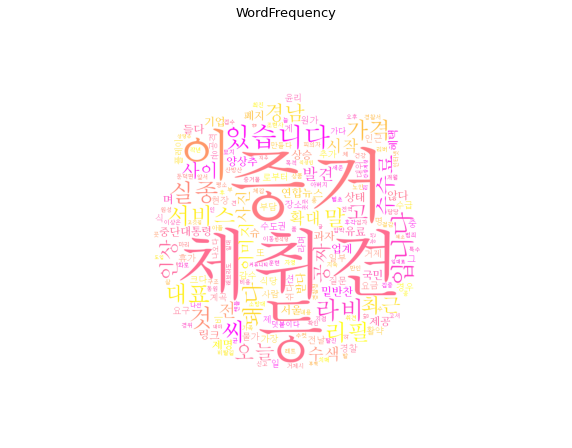

In [144]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordFrequency", size = 13)
plt.show